In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Hier sollten wir relative paths verwenden, mache ich noch 

In [72]:
# Einlesen der Daten
data_deng: pd.DataFrame = pd.read_csv('dataSources\BLAT_ECOLX_Deng_2012_Kopie.csv', delimiter = ';' )
data_firnberg = pd.read_csv('dataSources\BLAT_ECOLX_Firnberg_2014_Kopie.csv',delimiter = ';')
data_stiffler = pd.read_csv('dataSources\BLAT_ECOLX_Stiffler_2015_Kopie.csv',delimiter = ';')



DMS Score Spalten zu float konvertieren:

In [73]:
data_deng['DMS_score'] = data_deng['DMS_score'].str.replace(',', '.').astype(float)
data_deng.head()

data_stiffler['DMS_score'] = data_stiffler['DMS_score'].str.replace(',', '.').astype(float)
data_stiffler.head()

data_firnberg['DMS_score'] = data_firnberg['DMS_score'].str.replace(',', '.').astype(float)
data_firnberg.tail()



,mutant,mutated_sequence,DMS_score,DMS_score_bin
4778,W286G,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0056,0
4779,W286F,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.1729,0
4780,W286E,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0171,0
4781,W286C,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0024,0
4782,W286D,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0114,0


In [74]:

#Mutanten in einheitlicher Reihenfolge speichern, gehen alle von 24 bis 286, bei Firnberg fehlen einige
sortierung = data_deng.iloc[0:len(data_deng),0]
sortierung.head()

sortierung = sortierung.tolist()


Data Frame erstellen

In [75]:

columns = ['Stiffler', 'Deng', 'Firnberg']
index = [sortierung]
merged = pd.DataFrame( columns = columns, index = index)
merged.head()
#leerer frame

,Stiffler,Deng,Firnberg
H24C,NaN,NaN,NaN
H24Y,NaN,NaN,NaN
H24W,NaN,NaN,NaN
H24V,NaN,NaN,NaN
H24T,NaN,NaN,NaN


In [76]:
#dataframe füllen
for i in range(0,len(data_stiffler)):
    mutant = data_stiffler['mutant'][i]
    score = data_stiffler['DMS_score'][i]
    merged['Stiffler'][mutant]= score

merged.head()

  

,Stiffler,Deng,Firnberg
H24C,-0.41826,NaN,NaN
H24Y,-0.885025,NaN,NaN
H24W,-1.347586,NaN,NaN
H24V,-0.026874,NaN,NaN
H24T,-0.067188,NaN,NaN


In [77]:
#deng wird umgedreht *-1
for i in range(0,len(data_deng)):
    mutant = data_deng['mutant'][i]
    score = data_deng['DMS_score'][i]*-1
    merged['Deng'][mutant]= score

merged.head()

,Stiffler,Deng,Firnberg
H24C,-0.41826,3.924478,NaN
H24Y,-0.885025,2.170022,NaN
H24W,-1.347586,4.345218,NaN
H24V,-0.026874,3.011503,NaN
H24T,-0.067188,1.565248,NaN


In [78]:
for i in range(0,len(data_firnberg)):
    mutant = data_firnberg['mutant'][i]
    score = data_firnberg['DMS_score'][i]
    merged['Firnberg'][mutant]= score

print(merged)

       Stiffler      Deng Firnberg
H24C   -0.41826  3.924478   0.5646
H24Y  -0.885025  2.170022   0.7054
H24W  -1.347586  4.345218   0.6021
H24V  -0.026874  3.011503   1.2224
H24T  -0.067188  1.565248   1.2289
...         ...       ...      ...
W286G -3.228429   4.96307   0.0056
W286F -0.780425  4.542329   0.1729
W286E -2.545852  4.542329   0.0171
W286C -2.983762  4.542329   0.0024
W286A -3.178798   4.96307      NaN

[4996 rows x 3 columns]


Merged Dataframe nicht Normalisiert

In [79]:
mergedc_n = merged.copy()
mergedc_z = merged.copy()

print(mergedc_n.head(20))

      Stiffler      Deng Firnberg
H24C  -0.41826  3.924478   0.5646
H24Y -0.885025  2.170022   0.7054
H24W -1.347586  4.345218   0.6021
H24V -0.026874  3.011503   1.2224
H24T -0.067188  1.565248   1.2289
H24S  0.036166  1.901829   1.1215
H24R -0.002526  1.732651   1.0547
H24Q -0.135568  1.685328   0.9294
H24P -1.010848   2.74331   0.2836
H24D -0.181607  2.788294   1.0992
H24M -0.224781  4.345218      NaN
H24L -0.480347  3.924478   0.8055
H24K   0.01447   0.47765   1.2413
H24I -0.359191   2.83688   0.7909
H24G -0.060242  2.113703   1.1275
H24F -0.818487  4.345218   0.7883
H24E -0.279024  1.486533   0.9899
H24N -0.043093  1.102421   1.4825
P25C -0.364138   3.92495   0.6226
P25D -0.028403   3.92495   0.6841


N Normalisierter dataframe :  merged_n

In [80]:
def min_max_filter(mergedc_n: pd.DataFrame) -> pd.DataFrame:
    'Min-Max Normalisierung'
    for x in mergedc_n.columns:
        max_value: float = mergedc_n[x].max()
        min_value: float = mergedc_n[x].min()

        mergedc_n[x] = (mergedc_n[x] - min_value) / (max_value - min_value)
    return mergedc_n
print(min_max_filter(mergedc_n))


       Stiffler      Deng  Firnberg
H24C   0.811164  0.749673  0.194307
H24Y   0.697293  0.543632  0.242832
H24W   0.584448  0.799085   0.20723
H24V   0.906646  0.642454  0.421009
H24T   0.896811  0.472607  0.423249
...         ...       ...       ...
W286G  0.125601  0.871645  0.001654
W286F  0.722811  0.822233  0.059312
W286E  0.292121  0.822233  0.005618
W286C   0.18529  0.822233  0.000551
W286A  0.137709  0.871645       NaN

[4996 rows x 3 columns]


Z Normalisierter data frame: mergedc_z
mü und sigma für Datensätze : 

In [81]:
gauss = {'Stiffler':[],'Deng':[],'Firnberg':[]}

for x in merged.columns:
    mu = np.mean(merged[x])
    sigma = np.std(merged[x])
    
    gauss[x] = [mu, sigma]
print(gauss)



{'Stiffler': [-1.2555861699099258, 1.1515351455907572], 'Deng': [2.7197178679617875, 1.527209855765294], 'Firnberg': [0.5094850899205352, 0.44877201488038154]}


Z-Normalisierung

In [82]:
def z_filter(mergedc_z: pd.DataFrame) -> pd.DataFrame:
    'Z-Normalisierung'
    for x in mergedc_z.columns:
        mu = gauss[x][0]
        sigma = gauss[x][1]
        mergedc_z[x] = (mergedc_z[x]-mu)/ sigma
    return mergedc_z
print(z_filter(mergedc_z))


       Stiffler      Deng  Firnberg
H24C   0.727139  0.788864  0.122813
H24Y   0.321797 -0.359935  0.436558
H24W  -0.079893  1.064359  0.206374
H24V   1.067021  0.191058   1.58859
H24T   1.032012 -0.755934  1.603074
...         ...       ...       ...
W286G -1.713229  1.468922 -1.122809
W286F  0.412633  1.193425 -0.750014
W286E -1.120475  1.193425 -1.097183
W286C -1.500758  1.193425 -1.129939
W286A -1.670129  1.468922       NaN

[4996 rows x 3 columns]


##Normalisierte Datensätze mergen:
1. mean und var berechnen
2. für z und n normalisierte Datensatz 



mergedc_n_mv = mergedc_n.copy()
liste = mergedc_n_mv.mean(axis = 1)
print(liste)




In [83]:
def mean_var_merge(data : pd.DataFrame):
    
    data['mean'] = data.mean(axis = 1, skipna= True)
    data['var'] = data.var(axis = 1, skipna = True )
    return data
#print(mean_var_merge(mergedc_n_mv))
#print(mean_var_merge(mergedc_z_mv))
#print(mergedc_n_mv)

In [84]:
#mergedc_z_mv = mergedc_z.copy()

#print(mean_var_merge(mergedc_z_mv))


Wie namen eines Dataframe ausgeben lassen (Titel für plots) ? Weiß das jemand? stack overflow hat die gleiche frage unbeantwortet....

##Wie sehen unsere Verteilungen nach unterschiedlicher Normalisierung aus? 
1. Nebeneinander anzeigen lassen 


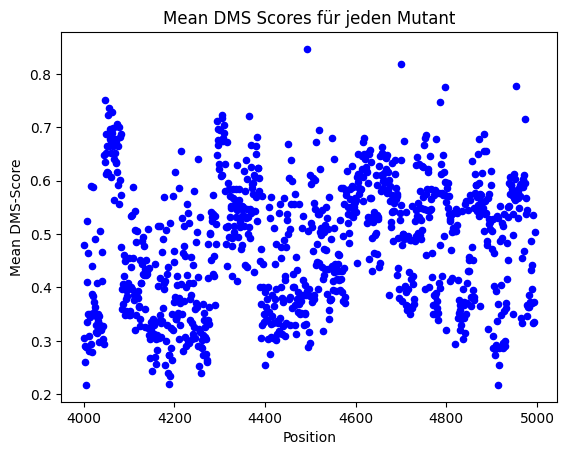

In [85]:

#def plot_zn(data : pd.DataFrame):
#     for x in range(4500, len(data):
#         score = data['mean'][x]
#         position = x
#         plot_mean = plt.scatter(position, scores, s=20, c='blue')
#     plt.xlabel('Position')
#     plt.ylabel('Mean DMS-Score')
#     plt.title('Mean DMS Scores für jeden Mutant')
#     return plot_mean

# plot_zn(mergedc_n_mv)
# plt.show()

for x in range(4000,len(mergedc_n_mv)):
        score = mergedc_n_mv['mean'][x]
        position = x
        plot_mean = plt.scatter(position, score, s=20, c='blue')
    # Diagramm anpassen
plt.xlabel('Position')
plt.ylabel('Mean DMS-Score')
plt.title('Mean DMS Scores für jeden Mutant')     

# Diagramm anzeigen
plt.show()


Merged Model bilden
Varianz Bilden

Quantile Thresholding
Otsu Thresholding
Count Zahl (Tops, Bottoms) 


data frame für merged [datensätze, mean, median,varianz]
data ergebniss dataframemerged[mean positionseffekte, var positionseffekte]
data frame einzelnd[mean positionseffekte, varianz positionseffekte]
5 data frames

POSITIONSEFFEKTE

In [86]:
mergedc_n_mv = mergedc_n.copy()
mergedc_z_mv = mergedc_z.copy()
mean_var_merge(mergedc_n_mv)
mean_var_merge(mergedc_z_mv)


,Stiffler,Deng,Firnberg,mean,var
H24C,0.727139,0.788864,0.122813,0.546272,0.090294
H24Y,0.321797,-0.359935,0.436558,0.132807,0.123592
H24W,-0.079893,1.064359,0.206374,0.396947,0.236378
H24V,1.067021,0.191058,1.58859,0.94889,0.332494
H24T,1.032012,-0.755934,1.603074,0.626384,1.009754
...,...,...,...,...,...
W286G,-1.713229,1.468922,-1.122809,-0.455705,1.910194
W286F,0.412633,1.193425,-0.750014,0.285348,0.637593
W286E,-1.120475,1.193425,-1.097183,-0.341411,1.177952
W286C,-1.500758,1.193425,-1.129939,-0.479091,1.421573


In [87]:

#append empty Position-column
mergedc_n_mv["Position"] = np.nan
mergedc_z_mv["Position"] = np.nan

#assign Positions
for i in range(0,len(mergedc_n_mv)):
    indices = [1,-1]
    s=mergedc_n_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_n_mv["Position"][i]=int(part)


mergedc_z_mv["Position"] = np.nan

#assign Positions
for i in range(0,len(mergedc_z_mv)):
    indices = [1,-1]
    s=mergedc_z_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_z_mv["Position"][i]=int(part)



C:\Users\Christoph Luh\AppData\Local\Temp\ipykernel_22264\2072775969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Position"][i]=int(part)
C:\Users\Christoph Luh\AppData\Local\Temp\ipykernel_22264\2072775969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Position"][i]=int(part)
C:\Users\Christoph Luh\AppData\Local\Temp\ipykernel_22264\2072775969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [88]:
#Position_means Df aufbauen
columns = ['mean_Stiffler_n','var_Stiffler_n','mean_Deng_n','var_Deng_n','mean_Firnberg_n','var_Firnberg_n','mean_all_n','var_all_n','mean_Stiffler_z','var_Stiffler_z','mean_Deng_z','var_Deng_z','mean_Firnberg_z','var_Firnberg_z','mean_all_z','var_all_z']
index = range(int(mergedc_n_mv["Position"][0]), int(mergedc_n_mv["Position"][-1])+1)
##warum muss ich hier nochmal Int() nutzen? Ich habe im Chunk darüber doch int(part) verwendet...(Positionswerte wurden scheinbar als floats gespeichert)?

position_means= pd.DataFrame( columns = columns, index = index)
position_means.index.name="Position"


In [89]:
for i in range(int(mergedc_n_mv["Position"][0]), int(mergedc_n_mv["Position"][-1])+1):
    Pos=[]
    for j in range(np.where(mergedc_n_mv["Position"]==i)[0][0], np.where(mergedc_n_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_n_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_n"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_n"]=np.nanvar(Pos)

for i in range(int(mergedc_z_mv["Position"][0]), int(mergedc_z_mv["Position"][-1])+1):
    Pos=[]
    for j in range(np.where(mergedc_z_mv["Position"]==i)[0][0], np.where(mergedc_z_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_z_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_z"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_z"]=np.nanvar(Pos)

In [90]:
#means für Positionen berechnen mit groupby

grouped_n=mergedc_n_mv.groupby("Position")
grouped_z=mergedc_z_mv.groupby("Position")
#(NAs should be excluded by default)

#Means der Positionen in Position_means DF einsetzen
position_means["mean_Stiffler_n"]= grouped_n.mean()["Stiffler"]
position_means["mean_Deng_n"]= grouped_n.mean()["Deng"]
position_means["mean_Firnberg_n"]= grouped_n.mean()["Firnberg"]
position_means["mean_Stiffler_z"]= grouped_z.mean()["Stiffler"]
position_means["mean_Deng_z"]= grouped_z.mean()["Deng"]
position_means["mean_Firnberg_z"]= grouped_z.mean()["Firnberg"]


In [91]:
#Varianzen noch einbringen
position_means["var_Stiffler_n"]= grouped_n.var()["Stiffler"]
position_means["var_Deng_n"]= grouped_n.var()["Deng"]
position_means["var_Firnberg_n"]= grouped_n.var()["Firnberg"]
position_means["var_Stiffler_z"]= grouped_z.var()["Stiffler"]
position_means["var_Deng_z"]= grouped_z.var()["Deng"]
position_means["var_Firnberg_z"]= grouped_z.var()["Firnberg"]


position_means

,mean_Stiffler_n,var_Stiffler_n,mean_Deng_n,var_Deng_n,mean_Firnberg_n,var_Firnberg_n,mean_all_n,var_all_n,mean_Stiffler_z,var_Stiffler_z,mean_Deng_z,var_Deng_z,mean_Firnberg_z,var_Firnberg_z,mean_all_z,var_all_z
Position,,,,,,,,,,,,,,,,
24,0.827952,0.009871,0.59217,0.019859,0.324853,0.01085,0.586504,0.054581,0.786898,0.125082,-0.089304,0.617338,0.966881,0.453596,0.54705,0.588671
25,0.868782,0.010995,0.575814,0.029516,0.251631,0.005555,0.565409,0.07808,0.932237,0.139314,-0.180497,0.917549,0.49345,0.232222,0.415063,0.616515
26,0.887442,0.001312,0.487997,0.009361,0.315543,0.007382,0.610183,0.059811,0.998662,0.01663,-0.670128,0.291014,0.906685,0.308594,0.318937,0.815305
27,0.463575,0.039616,0.654033,0.005709,0.095793,0.009894,0.404467,0.071123,-0.510157,0.50198,0.255614,0.177461,-0.514142,0.413599,-0.256228,0.476164
28,0.712919,0.045084,0.584403,0.017025,0.189328,0.009222,0.518661,0.069304,0.377421,0.571262,-0.132612,0.529266,0.090621,0.385542,0.113409,0.522439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.511994,0.082602,0.525065,0.018866,0.117033,0.019768,0.384697,0.074135,-0.337803,1.046659,-0.463454,0.58649,-0.376808,0.826386,-0.392689,0.779453
283,0.577036,0.064666,0.551495,0.013882,0.151755,0.01685,0.426762,0.068049,-0.106276,0.819396,-0.31609,0.431554,-0.152312,0.704399,-0.191559,0.625586
284,0.838571,0.021394,0.532812,0.020676,0.3261,0.009417,0.570109,0.060444,0.824699,0.271089,-0.420258,0.642744,0.974941,0.393654,0.450595,0.806401


         mean_Stiffler_n mean_Firnberg_n mean_Deng_n mean_all_n  \
Position                                                          
24              0.827952        0.324853     0.59217   0.586504   
25              0.868782        0.251631    0.575814   0.565409   
26              0.887442        0.315543    0.487997   0.610183   
27              0.463575        0.095793    0.654033   0.404467   
28              0.712919        0.189328    0.584403   0.518661   
...                  ...             ...         ...        ...   
282             0.511994        0.117033    0.525065   0.384697   
283             0.577036        0.151755    0.551495   0.426762   
284             0.838571          0.3261    0.532812   0.570109   
285             0.768163        0.250498    0.599175   0.544435   
286             0.314421        0.027791    0.847602   0.403191   

         var_Stiffler_n var_Firnberg_n var_Deng_n var_all_n mean_Stiffler_z  \
Position                                         

<Axes: ylabel='Position'>

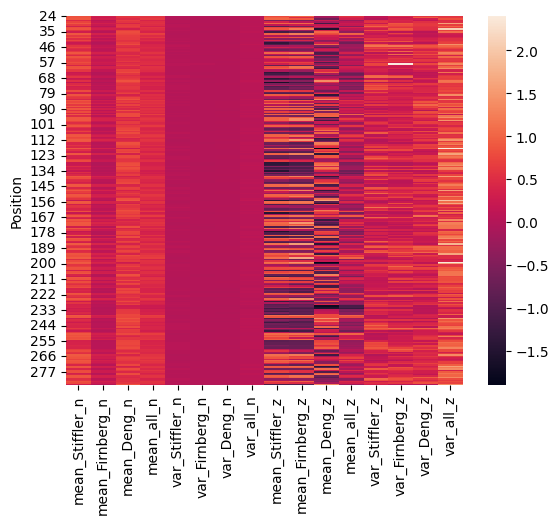

In [146]:
# Für die Heatmapdarstellung nach dem Schema (Mean_S_n, Mean_F_n, Mean_D_n, Mean_All_n, Var_s_n, Var_F_n,...) muss der DF positon_mean umsortiert werden
neue_reihenfolge = [0, 4, 2, 6, 1, 5, 3, 7, 8, 12, 10, 14, 9, 13, 11, 15]
position_means_rearranged = position_means.iloc[:, neue_reihenfolge]
print(position_means_rearranged)


data_heatmap = position_means_rearranged.astype(float)
sns.heatmap(data_heatmap)

